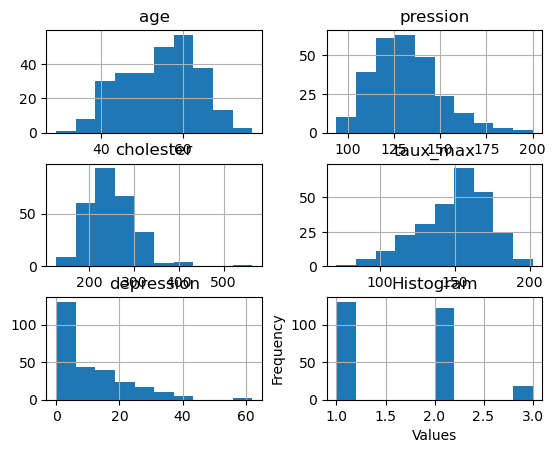

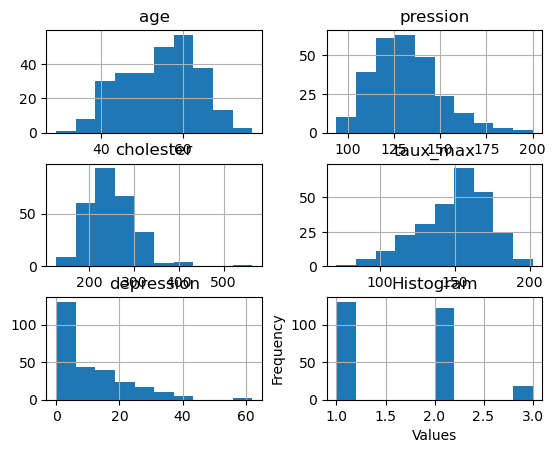

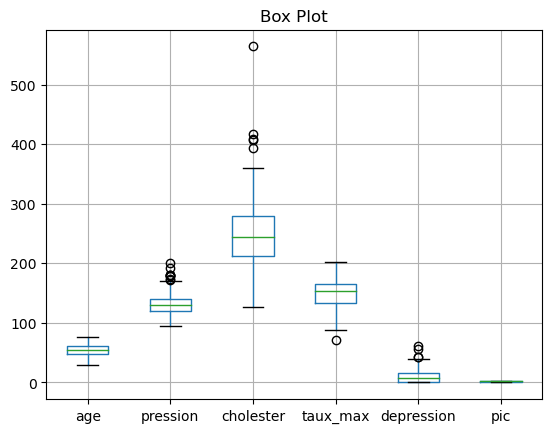

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt

def import_data():
    global data
    filepath = filedialog.askopenfilename(filetypes=(('Text files', '*.txt'), ('CSV files', '*.csv')))
    if filepath:
        try:
            if filepath.endswith('.csv'):
                data = pd.read_csv(filepath)
            elif filepath.endswith('.txt'):
                data = pd.read_table(filepath, sep='\t')
            messagebox.showinfo("Data Imported", f"Data imported successfully from: {filepath}")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to import data: {e}")
    else:
        messagebox.showwarning("File not found", "Please select a file.")

def manipulate():
    if data is not None:
        selected_fct = selected_fct_var.get()
        numeric_columns = data.select_dtypes(include=['number'])
        if not numeric_columns.empty:
            if selected_fct == "Mean":
                result_label.config(text=f"Mean: {numeric_columns.mean()}")
            elif selected_fct == "Min":
                result_label.config(text=f"Min: {numeric_columns.min()}")
            elif selected_fct == "Max":
                result_label.config(text=f"Max: {numeric_columns.max()}")
        else:
            messagebox.showwarning("No numeric columns", "There are no numeric columns to manipulate.")
    else:
        messagebox.showwarning("No data", "Please upload a file first.")

def visualize():
    if data is not None:
        selected_tool = selected_tool_var.get()
        if selected_tool == "Histogram":
            numeric_columns = data.select_dtypes(include=['number'])
            if not numeric_columns.empty:
                numeric_columns.hist()
                plt.title("Histogram")
                plt.xlabel("Values")
                plt.ylabel("Frequency")
                plt.show()
            else:
                messagebox.showwarning("No numeric columns", "There are no numeric columns to plot.")
        elif selected_tool == "Box plot":
            data_boxplot = data.select_dtypes(include=['number'])
            if not data_boxplot.empty:
                data_boxplot.boxplot()
                plt.title("Box Plot")
                plt.show()
            else:
                messagebox.showwarning("No numeric columns", "There are no numeric columns to plot.")
    else:
        messagebox.showwarning("No data", "Please upload a file first.")

data = None

window = tk.Tk()
window.title("Data Visualization and Manipulation")
window.geometry("500x200")

# Frame for importing data
frame_import = tk.Frame(window)
frame_import.pack(pady=10)
btn_import = tk.Button(frame_import, text="Import Data", command=import_data)
btn_import.pack(side="left", padx=10)

# Frame for manipulation
frame_manipulate = tk.Frame(window)
frame_manipulate.pack(pady=10)
selected_fct_var = tk.StringVar()
selected_fct_var.set("Mean")
menu_fct = tk.OptionMenu(frame_manipulate, selected_fct_var, "Mean", "Min", "Max")
menu_fct.pack(side="left", padx=10)
btn_manipulate = tk.Button(frame_manipulate, text="Manipulate", command=manipulate)
btn_manipulate.pack(side="left", padx=10)
result_label = tk.Label(frame_manipulate, text="")
result_label.pack(side="left", padx=10)

# Frame for visualization
frame_visualize = tk.Frame(window)
frame_visualize.pack(pady=10)
selected_tool_var = tk.StringVar()
selected_tool_var.set("Histogram")
menu_tool = tk.OptionMenu(frame_visualize, selected_tool_var, "Histogram", "Box plot")
menu_tool.pack(side="left", padx=10)
btn_visualize = tk.Button(frame_visualize, text="Visualize", command=visualize)
btn_visualize.pack(side="left", padx=10)

window.mainloop()
